# MACHINE LEARNING AN END TO END SOLUTION: Section 1 
# Loan Application 
Presented by Shaun &copy; 2018


*Throughout the financial sector, machine learning algorithms are being developed to approve loan applications. In this project, we will process a dataset and use techniques to construct three machine learning models to predict on loan approvals. A dataset with 1102 observations will be examined, cleaned and organised; a data exploration will identify the features and their data types and the most important features, which are the best predictors for loan approvals.*



## Data Pre-processing
*Data pre-processing is a data mining technique used to transform and prepare raw data; the raw data will be transformed into a state, so it is ready to be processed, by the Machine Learning Models. Once the data is transformed, we will explore the data using data visualization techniques, common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our dataset.*
### Defining the problem statement
*Before starting a task we need to know the problem statement we are trying to resolve: Complete the analysis of what sorts of applicants are likely to be approved or denied a Loan. You also need to know what the classification class label is. In this case it is,Loan_Status which can only be classifed as a 1 for approved or 0 for denied. **Note:** This is described as a binary classification machine learning task.* 


### Let's get started!
###### Importing Necessary Libraries

Read more about some of the libraries below:

1. *Scikit-learn, Machine Learning in Python, Simple and efficient tools for data mining and data analysis:*  __[Scikit-learn ](http://scikit-learn.org/)__

2. *Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language:*   __[Pandas](https://pandas.pydata.org/)__

3. *NumPy is the fundamental package for scientific computing with Python:* __[Numpy](http://www.numpy.org/)__

4. *Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms:*  __[Matplotlib](https://matplotlib.org/index.html#)__

In [164]:
import numpy as np
import pandas as pd

##importing the required classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##import the train test split function: used to split the data into a train and test dataset
from sklearn.model_selection import train_test_split

##importing the scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
 
##importing the Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

### Load the Data Set Using Pandas

*In the following cells, we will import our dataset from a .csv using the excellent library **Pandas**. This will load the data into a 2D array dataFrame that can then be analyised.* 

#### We load the dataset from the csv file using pandas pd 
1. *We load the data into a DataFrame called **df** which will hold the dataset we load, feel free to call it a name you want*
2. *The dataset: LoanData.csv, is placed on the c: drive in a folder called ml.*
3. *Run **pd.read_csv(name and location of file here)** to load a dataset*

In [165]:
df = pd.read_csv('c:\\ml\\LoanData.csv')

###  Exploratory Data Analysis
*We will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset. For this purpose, we will use Pandas' it has many built-in functions. Lets do an inital analysis and see what type of data in present in the top 20 observations(rows) using:* **head(20)**  *The default is the top 5 rows returned, adjust the number in brackets to return requied amount of observations(rows).*

### Data Dictionary
- **Loan_Status:** 	0 = Failed, 1 = Passed  
- **PropertyOwner:** 	Yes, No  	
- **Credit_History:**	Has Good credit History. Yes, No     	
- **Employed:**	        Yes, No.  	
- **Graduate:**	        Yes, No.	
- **Dependents:**	    0-7	
- **Marital_Status:**	Married: YES, N0
- **Gender:**	        Male, Female
- **Loanid:**	        Incremental Loanid Number	

In [166]:
df.head(20) #### return the top 20 observations and see the types of data present

,Loanid,Gender,Marital_Status,Dependents,Graduate,Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,PropertyOwner,Loan_Status
0,1,Male,NO,0,NO,YES,5849.0,0.0,120,360,YES,YES,1.0
1,2,Male,YES,1,YES,YES,4583.0,1508.0,128,360,YES,YES,1.0
2,3,Male,YES,0,YES,YES,3000.0,0.0,66,360,YES,YES,1.0
3,4,Male,YES,0,NO,YES,2583.0,2358.0,120,360,YES,YES,1.0
4,5,Male,NO,0,YES,YES,6000.0,0.0,141,360,YES,YES,1.0
5,6,Male,YES,2,YES,YES,5417.0,4196.0,267,360,YES,YES,1.0
6,7,Male,YES,0,NO,YES,2333.0,1516.0,95,360,YES,YES,1.0
7,8,Male,YES,3,YES,NO,3036.0,2504.0,158,360,NO,NO,0.0
8,9,Male,YES,2,YES,YES,4006.0,1526.0,168,360,YES,YES,1.0
9,10,Male,YES,1,YES,YES,12841.0,10968.0,349,360,YES,YES,1.0


**Lets start exploring the dataset further:**, *Using the info(), describe() and isnull().sum() and (shape, columns)  functions as below.
Remove hashes to review the data each function brings back!*

In [167]:
df.info()   # examine coloumns, row counts, datatypes, missing - null values, 
print(df.describe())  # examine the distribution of data including, count, mean, std=standard deviation, can only do numerical data
df.isnull().sum() # count the number of missing values in each column
#df.tail() # examine the last 5 rows note default is 5 rows add number in brackets to bring back more data
#df.head()  # examine the first 5 rows
#print(df.columns)  # examine the columns in the dataset
#print(df.shape)     # output the column and row count in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 13 columns):
Loanid               1102 non-null int64
Gender               1102 non-null object
Marital_Status       1102 non-null object
Dependents           1102 non-null int64
Graduate             1102 non-null object
Employed             1102 non-null object
ApplicantIncome      1101 non-null float64
CoapplicantIncome    1102 non-null float64
LoanAmount           1102 non-null int64
Loan_Amount_Term     1102 non-null int64
Credit_History       1102 non-null object
PropertyOwner        1102 non-null object
Loan_Status          1100 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 112.0+ KB
            Loanid   Dependents  ApplicantIncome  CoapplicantIncome  \
count  1102.000000  1102.000000      1101.000000        1102.000000   
mean    551.499093     1.124319      4942.602180        1352.931760   
std     318.262734     1.460957      5475.281464        2310.206409   


Loanid               0
Gender               0
Marital_Status       0
Dependents           0
Graduate             0
Employed             0
ApplicantIncome      1
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
PropertyOwner        0
Loan_Status          2
dtype: int64

####  Determine number of accepted and falied loan application in the dataset
*We can see from the describe() function, the 'mean' for: **Loan_Status is 0.675455**, which can also be described as a percentage: **67%** applicants are good borrowers. We can also count the number of accepted and failed loan aplications various ways as below*

In [168]:
##format the loan status outpput as below
print('-----------------Formatted--------------------------------')
Pass = df[df['Loan_Status'] == 1]
Fail = df[df['Loan_Status'] == 0]
print('Failed Applications: {}'.format(len(df[df['Loan_Status'] == 0])))
print('Passed Applications: {}'.format(len(df[df['Loan_Status'] == 1])))
print('-----------------UnFormatted--------------------------------')
## two other simple ways to get the class label data without formating
print(df.groupby('Loan_Status').size())
### value_counts() is very simple and useful for this.
df.Loan_Status.value_counts()

-----------------Formatted--------------------------------
Failed Applications: 357
Passed Applications: 743
-----------------UnFormatted--------------------------------
Loan_Status
0.0    357
1.0    743
dtype: int64


1.0    743
0.0    357
Name: Loan_Status, dtype: int64

### Analyse the Data:
*The Exploratory Data Analysis will give us an overview of how much data there is how many features and observations and the distribution of the data and any issues that may present a challenge. We can detect Categorical data,and where we have null or missing data; these have to be handled appropriately. These will either need to be filled in or deleted. First you need to identify which observations or features contain the missing data, then usually you will agree with a user who has a domain expert knowledge on how to handle missing/null data.*


There are **1102 observations (rows) and 13 columns**; running the **info()**, **describe()** ,**isnull().sum()** and **value_counts()**functions allows us to detect:

1. We can see we have categorical data looking at the **head() and tail()** of the data in addition to seeing from **info()**, it is of datatype object for the features: Gender,Employed, Marital_Status,Graduate,Credit_History,PropertyOwner. These will need to be changed!
2. We can see from the **info()** data analysis, that there are null values present.
3. Loan_Status reported 2 null values and ApplicantIncome reported 1 null value.
4. We can see from the **describe()** data analysis, that there are columns that have a minimum value of zero (0), this can indicate missing values. After column analysis for, Dependents, ApplicantIncome and CoapplicantIncome: we can confirm these would all be valid values. For instance if we had LoanAmount or age and the values were zero (0) for a loan applicant, we would would be able to determine these values woud be invalid, therefore missing.
5. Running **isnull().sum()** will count the number of missing values in each column.
6.  Looking at the **describe()** and the **mean** for Loan_Status: we can see **67%**  have been approved loans and **value_counts()** shows 743 applicants got loans.
7. We can also see **info()** displays the memory usage: 112.0+ KB used by the Dataframe to hold the data. We we look at ways to more than halve the storage used, useful on big dataframes which consume a lot of memory.

**Note:** We can now produce stacked Bar Charts for the categorical features to get a visual overview of the data distirbution for failed and approved loan applications.

### Bar Charts for Categorical Features
- Loan Applications
- Employment
- Graduate
- Marital Status 
- PropertyOwner
- Credit_History

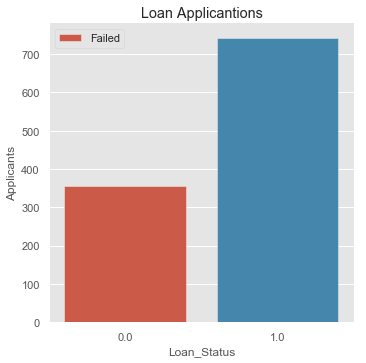

In [169]:
sns.catplot(x='Loan_Status', kind='count', data=df);
plt.ylabel('Applicants')
plt.title('Loan Applicantions')
plt.legend(('Failed', 'Passed'))

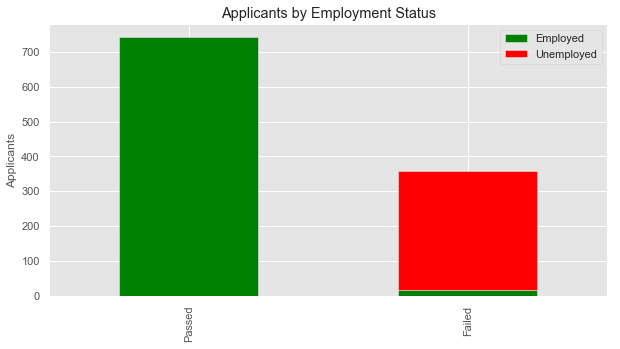

In [170]:
Passed = df[df['Loan_Status']==1]['Employed'].value_counts()
Failed = df[df['Loan_Status']==0]['Employed'].value_counts()
dgph = pd.DataFrame([Passed,Failed])
dgph.index = ['Passed','Failed']
dgph.plot(kind='bar',stacked=True, figsize=(10,5),color=('green','red'))
plt.ylabel('Applicants')
plt.title('Applicants by Employment Status')
plt.legend(('Employed', 'Unemployed'))

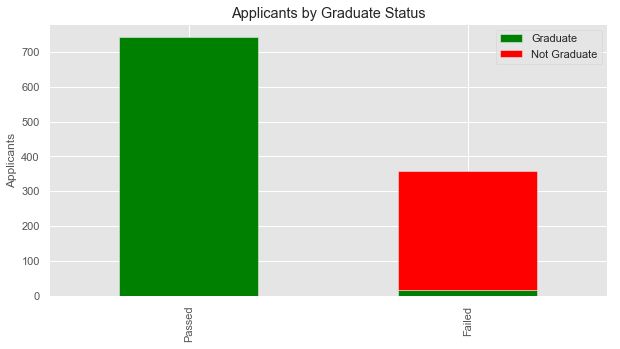

In [171]:
passed = df[df['Loan_Status']==1]['Graduate'].value_counts()
failed = df[df['Loan_Status']==0]['Graduate'].value_counts()
dgph = pd.DataFrame([Passed,Failed])
dgph.index = ['Passed','Failed']
dgph.plot(kind='bar',stacked=True, figsize=(10,5),color=('green','red'))
plt.ylabel('Applicants')
plt.title('Applicants by Graduate Status')
plt.legend(('Graduate', 'Not Graduate'))

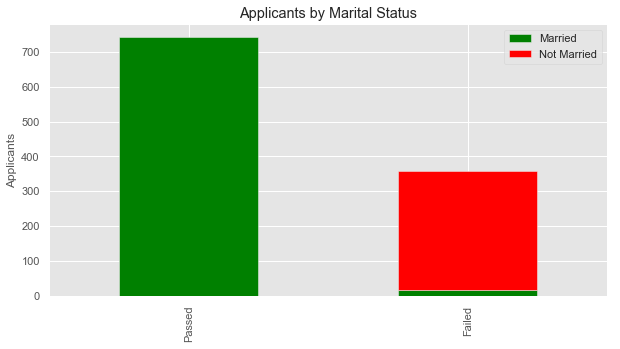

In [172]:
passed = df[df['Loan_Status']==1]['Marital_Status'].value_counts()
failed = df[df['Loan_Status']==0]['Marital_Status'].value_counts()
dgph = pd.DataFrame([Passed,Failed])
dgph.index = ['Passed','Failed']
dgph.plot(kind='bar',stacked=True, figsize=(10,5),color=('green','red'))
plt.ylabel('Applicants')
plt.title('Applicants by Marital Status')
plt.legend(('Married', 'Not Married'))

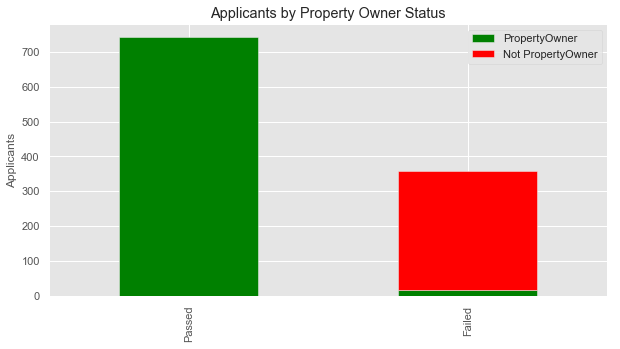

In [173]:
passed = df[df['Loan_Status']==1]['PropertyOwner'].value_counts()
failed = df[df['Loan_Status']==0]['PropertyOwner'].value_counts()
dgph = pd.DataFrame([Passed,Failed])
dgph.index = ['Passed','Failed']
dgph.plot(kind='bar',stacked=True, figsize=(10,5),color=('green','red'))
plt.ylabel('Applicants')
plt.title('Applicants by Property Owner Status')
plt.legend(('PropertyOwner', 'Not PropertyOwner'))

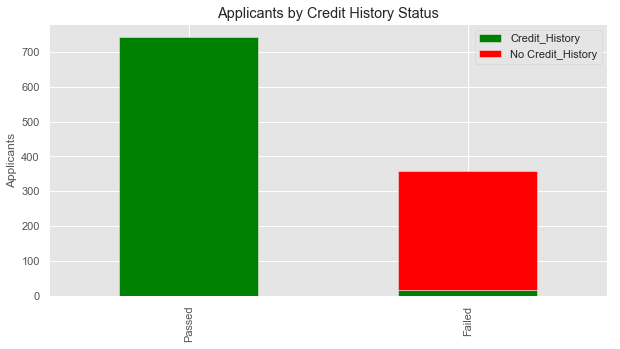

In [174]:
passed = df[df['Loan_Status']==1]['Credit_History'].value_counts()
failed = df[df['Loan_Status']==0]['Credit_History'].value_counts()
dgph = pd.DataFrame([Passed,Failed])
dgph.index = ['Passed','Failed']
dgph.plot(kind='bar',stacked=True, figsize=(10,5),color=('green','red'))
plt.ylabel('Applicants')
plt.title('Applicants by Credit History Status')
plt.legend(('Credit_History', 'No Credit_History'))

### Analyse the Bar Chart Data:
*We can see the distribution of data is heavily imbalanced on the categorical fetures used in the bar charts for failed and approved loan applications. Although, this type of data distribution on important features can help the classifier create good models.*



## Feature Engineering
*Feature engineering is an investigative technique used to highlight features of importance and irelevant features that need to be dropped to ensure machine learning algorithms work and the models are optimised. We will now do an investigation of the features and do further data analysis and highlight correlations, distributions, importance and remove irrelevant ones.* **Note:** *Domain knowledge of the data or specialist knowledge which relates to the field the data and features are part of, is usually required in Feature Engineering.*

### Drop Irrelevant features
Loanid is a primary key, which is used to uniquely identify the data, row by row. As this is a rising numeric value, it is redundant as a predictive feature. We do not want any model using a redundant feature as a quantitative predictor. Irrelevant features increase the complexity and negatively impact the models accuracy. So we will drop this feature using **Pandas:** [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [175]:
#Drop the feature Loanid.where 1 is the axis number (0 for rows and 1 for columns.) Use the inplace=True to remove it from the dataframe permantley
df.drop(['Loanid'], axis=1, inplace=True)

##python del statement can also be used for this example: del df['Loanid'] 

### Categorical Data

This section will cover categorical data conversions:
1. Transforming the categorical data using: __[Numpys Where](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.where.html)__ 
2. One-hot encoding:  __[Pandas get_dummies]( https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)__ 

In [176]:
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset.
df['Employed'] = np.where(df['Employed'].str.contains('YES'), 1, 0)
df['Marital_Status'] = np.where(df['Marital_Status'].str.contains('YES'), 1, 0)
df['Graduate'] = np.where(df['Graduate'].str.contains('YES'), 1, 0)
df['Credit_History'] = np.where(df['Credit_History'].str.contains('YES'), 1, 0)
df['PropertyOwner'] = np.where(df['PropertyOwner'].str.contains('YES'), 1, 0)

#One hot encding on the Gender column.
df = pd.get_dummies(df,columns=['Gender']) 

### Missing Data!
As we can see from the **EDA** and the analysis from the functions: **df.info()** , **print(df.describe())** , **df.isnull().sum()**  that:
1. Loan_Status has 2 missing/null values 
2. ApplicantIncome has 1 missing/null value.
3. In this case the number of missing rows is minimal, so we will delete this data. **Note:** Always try and consult with a domain data expert to agree on how to handle missing data.

**Research on:** [Missing Data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/) <br>
**Pandas working with missing data:** [Pandas Missing Data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)


Now we need to detect which observations have missing data!

In [177]:
#This command will detect which rows have missing values
print(df[df.Loan_Status.isnull()])

      Marital_Status  Dependents  Graduate  Employed  ApplicantIncome  \
1093               1           5         0         0              NaN   
1101               0           3         0         0              0.0   

      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1093                0.0         115               360               0   
1101                0.0         120               360               0   

      PropertyOwner  Loan_Status  Gender_Female  Gender_Male  
1093              0          NaN              1            0  
1101              0          NaN              1            0  


**Delete Missing Values:**
In our example we ony have 2 rows with missing values, we will proceed and delete the missing values, using **dropna() :**  More details on this function here:   __[Pandas dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)__


In [178]:
#In this example we ony have 2 rows with missing values we will drop them from the dataset using dropna. The dropna(inplace=True)
#will delete any rows with missing values

df.dropna(inplace=True)

##print(data.isnull().sum()) # count the number of missing values in each column
## review the 2 observations (rows)have been dropped and all attributes have  1100 non-null.
df.info()  
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Marital_Status       1100 non-null int32
Dependents           1100 non-null int64
Graduate             1100 non-null int32
Employed             1100 non-null int32
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1100 non-null float64
LoanAmount           1100 non-null int64
Loan_Amount_Term     1100 non-null int64
Credit_History       1100 non-null int32
PropertyOwner        1100 non-null int32
Loan_Status          1100 non-null float64
Gender_Female        1100 non-null uint8
Gender_Male          1100 non-null uint8
dtypes: float64(3), int32(5), int64(3), uint8(2)
memory usage: 83.8 KB


### Selecting the Appropriate Data Types
By selecting the appropriate data types we can make the pandas DataFrame smaller which will enable faster data processing, This technique is useful on big data. We have already used the function **info()** which has given us the details of each data type and the size of the Dataframe in memory.
We use **pandas.DataFrame.astype** to convert features which have a 0 or 1 value, to an appropriate datatype. For 1 and 0 we can use: **int8**  which consumes 1 byte of memory and has a range between 0/255. For instance currently Loan_Status is set as **float64** which consumes 8 bytes of memory. We can convert datatypes by using the command: **astype(int)**  __[pandas.DataFrame.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)__

In [179]:
## function to convert datatypes, this will convert Loan_Status from float64 to int8.
df['Loan_Status'] = df.Loan_Status.astype('int8') 

## function to convert datatypes, this will convert  from int32 to int8.
df['Marital_Status'] = df.Marital_Status.astype('int8') 
df['Dependents'] = df.Dependents.astype('int8') 
df['Graduate'] = df.Graduate.astype('int8') 
df['Employed'] = df.Employed.astype('int8')
df['Credit_History'] = df.Credit_History.astype('int8') 
df['PropertyOwner'] = df.PropertyOwner.astype('int8') 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Marital_Status       1100 non-null int8
Dependents           1100 non-null int8
Graduate             1100 non-null int8
Employed             1100 non-null int8
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1100 non-null float64
LoanAmount           1100 non-null int64
Loan_Amount_Term     1100 non-null int64
Credit_History       1100 non-null int8
PropertyOwner        1100 non-null int8
Loan_Status          1100 non-null int8
Gender_Female        1100 non-null uint8
Gender_Male          1100 non-null uint8
dtypes: float64(2), int64(2), int8(7), uint8(2)
memory usage: 52.6 KB


#### Review the Data is now a state expected.

*We can see we have no missing values. Datatypes have been converted to the appropriate values. We can see memory usage has gone from: 83.8 KB  to 52.6 KB. On huge datasets, this could prove a cruicial performnace benefit.*

#### Review the Data using the describe() function.
*Now we have converted the datatypes and they are al numeric. The describe function can now return data on every column. Using describe() we can review the mean, max and min values, which allows us to detect any outliers which may negatively impact a machine learning models general accuracy*

**Outliers:** *An outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate an error is the data; the latter are usually always excluded from the data set. An outlier can cause a serious negative impact on a machine learning models accuracy. To detect outliers we can use this definition for outliers:*  [Outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) <br>
Disscussion on: [Outliers to drop or not](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)


In [180]:
print(df.describe())

       Marital_Status   Dependents     Graduate     Employed  ApplicantIncome  \
count     1100.000000  1100.000000  1100.000000  1100.000000      1100.000000   
mean         0.576364     1.119091     0.685455     0.691818      4947.095455   
std          0.494359     1.456497     0.464546     0.461952      5475.740716   
min          0.000000     0.000000     0.000000     0.000000         0.000000   
25%          0.000000     0.000000     0.000000     0.000000      2720.000000   
50%          1.000000     0.000000     1.000000     1.000000      3691.500000   
75%          1.000000     2.000000     1.000000     1.000000      5429.750000   
max          1.000000     7.000000     1.000000     1.000000     81000.000000   

       CoapplicantIncome   LoanAmount  Loan_Amount_Term  Credit_History  \
count        1100.000000  1100.000000       1100.000000     1100.000000   
mean         1355.391636   147.090909        340.523636        0.745455   
std          2311.585838    83.319839        

#### Histograms 
*We can now also use histograms to visualise all the data and Plot histograms for each attribute*

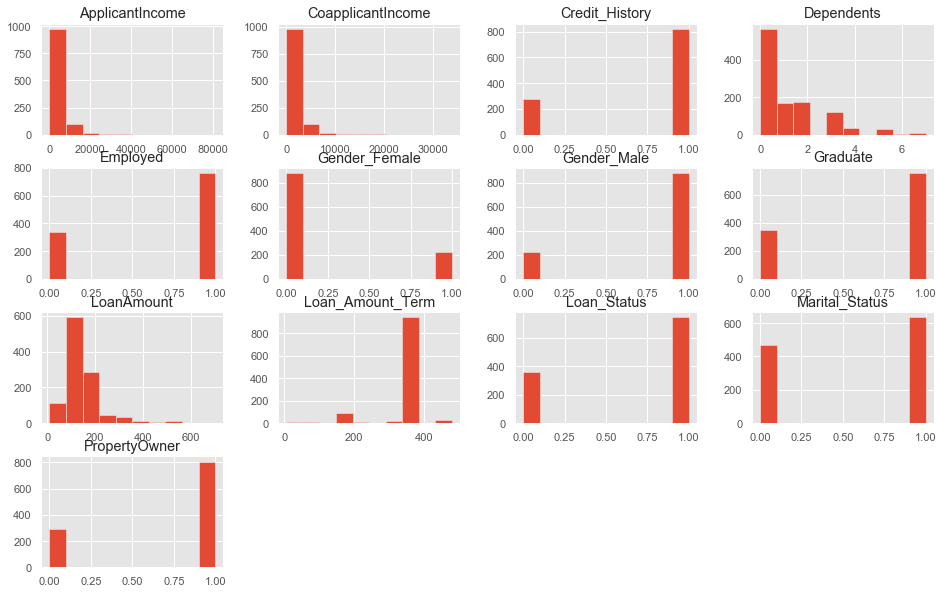

In [181]:
#figsize to set the size of the image, edit to your preferred size
df.hist(figsize = (16, 10))
#plt.show displays the image
plt.show()

####  Correlation matrix
*Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. More details here:*  __[Seaborn  (sns)](https://seaborn.pydata.org/)__

*We can use a* **Seaborn Heat Map** *which allows us to make a correlation matrix for exploratory analysis: it allows us to quickly observe the relationship between every variable within the matrix. From this analysis we can see a correlation between Employed 0.96, Credit History 0.69 & Property Owner 0.87 for our class label Loan Status:* **Note:**  *High correlations are displayed with numbers closer to 1.0 and with increasing red shades, and lower correlations are displayed with decreasing values with blue shades.* 

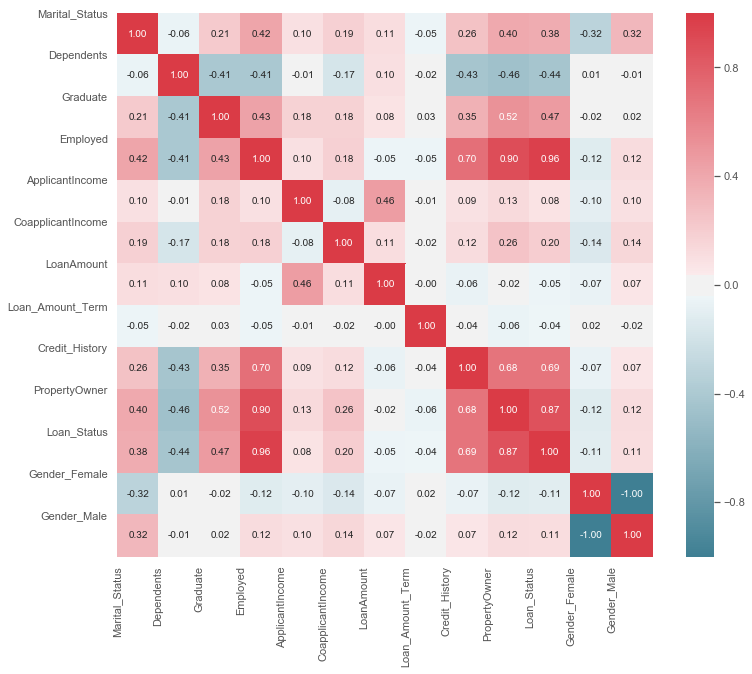

In [182]:
corr = df.corr()
#figsize to set the size of the image, edit to your preferred size
fig, ax = plt.subplots(figsize=(12, 10))
#Make a diverging palette between two HUSL colors: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw a heatmap with the numeric values in each cell
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

#plt.show displays the image
plt.show()

### Group BY
*We have seen from the **Correlation Matrix:Seaborn Heat Map** above that Credit_History and PropertyOwner seem to be important features in determining Credut approval.
Pandas has a very useful function called: **groupby**, that will allow us to group on features of interest and review credit approval rates. We wiill apply; **mean()**,  to get the mean values. You can alos use **count()** to get the numbers in each area. These mean values can be interpreted as a % for Loan_Status. Review the output!.*

**Pandas Groupby:** *More info here:*  __[Pandas Groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)__


In [183]:
df.groupby(['Credit_History','PropertyOwner']).mean()

Marital_Status  Dependents  Graduate  Employed  \
Credit_History PropertyOwner                                                   
0              0                    0.260274    2.634703  0.242009  0.004566   
               1                    0.688525    0.639344  0.983607  0.606557   
1              0                    0.226667    1.080000  0.413333  0.013333   
               1                    0.695302    0.716779  0.818792  0.969128   

                              ApplicantIncome  CoapplicantIncome  LoanAmount  \
Credit_History PropertyOwner                                                   
0              0                  3554.063927         427.671233  153.602740   
               1                  5987.557377        2539.163934  164.737705   
1              0                  4534.053333         236.640000  137.120000   
               1                  5312.979866        1643.803758  144.735570   

                              Loan_Amount_Term  Loan_Status  Gender_Female  \
Credit_History PropertyOwner                                                 
0              0                    349.315068     0.000000       0.269406   
               1                    328.622951     0.573770       0.163934   
1              0                    340.160000     0.000000       0.306667   
               1                    338.950336     0.950336       0.171812   

                              Gender_Male  
Credit_History PropertyOwner               
0              0                 0.730594  
               1                 0.836066  
1              0                 0.693333  
               1                 0.828188

In [184]:
## view by distribution using count, can also filter on Loan_Status by using:  data.groupby(['Credit_History','PropertyOwner']).Loan_Status.count()
df.groupby(['Credit_History','PropertyOwner']).count()

Marital_Status  Dependents  Graduate  Employed  \
Credit_History PropertyOwner                                                   
0              0                         219         219       219       219   
               1                          61          61        61        61   
1              0                          75          75        75        75   
               1                         745         745       745       745   

                              ApplicantIncome  CoapplicantIncome  LoanAmount  \
Credit_History PropertyOwner                                                   
0              0                          219                219         219   
               1                           61                 61          61   
1              0                           75                 75          75   
               1                          745                745         745   

                              Loan_Amount_Term  Loan_Status  Gender_Female  \
Credit_History PropertyOwner                                                 
0              0                           219          219            219   
               1                            61           61             61   
1              0                            75           75             75   
               1                           745          745            745   

                              Gender_Male  
Credit_History PropertyOwner               
0              0                      219  
               1                       61  
1              0                       75  
               1                      745

#### Review the columns in the dataset
We can review the columns in the dataset using **print(data.columns)**. We need to highlight the features of the data and the class lable. So the **train_test_split** function can select the right columns to feed into the model and separate the class label which is the Loan_Status to be predicted on. We will use the **.loc** function to locate the group of columns which are the features to be fed into the model for the **train_test_split** function.

In [185]:
print(df.columns)
##print(data['Loan_Status'])  ## this identifies the class lable 
##print(data.loc[:, data.columns != 'Loan_Status'])  ## this will identify all the features to be fed in the model

Index(['Marital_Status', 'Dependents', 'Graduate', 'Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'PropertyOwner', 'Loan_Status',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


##  Train Test Split Method

We now need to split the data before training the Machine Learning models.

This first step, will be to split the data into a **training dataset** and a **test dataset**, by using the **train_test_split** statement. **Note:**  *Typically when spliting data, X relates to the feature data and y relates to the class label.ie the class label we need to predict on, in our case y relates to the* **loan_status**
1. X_train, y_train will be the training data and  X_test, y_test will be the testing data. .
2. We have used the **.loc** function to locate the group of columns which are the features to be used on the model.More details here:  __[.loc function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)__ 
3. **Statify:** to ensure the percentage of samples for each loan_status class are evenly split between the train dataset and test dataset. 
4. **test_size:** Test dataset size specified to be at 30% of total data. 
5. **random_state** is commonly set to **42**. The actual random_state number can be anything, the important thing is that everytime we use 42, we will always get the same output for the data split, which is useful if we want reproducible results. Why 42? **The Hitchhiker's Guide to the Galaxy**.


More details here:  __[train test split method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Loan_Status'], df['Loan_Status'], stratify=df['Loan_Status'], test_size=0.30, random_state=42)

#### View how the train_test_split method divides the data

In [187]:
print("Shape of the X_train dataset: ", X_train.shape)
print("Shape of the y_train dataset: ", y_train.shape)
print("Shape of the X_test dataset: ", X_test.shape)
print("Shape of the y_test dataset: ", y_test.shape)
print('----------------------------------------------')
print("Training Dataset, counts of y label '1': {}".format(sum(y_train==1)))
print("Training Dataset, counts of y label '0': {}".format(sum(y_train==0)))
print("Testing Dataset, counts of y label '1': {}".format(sum(y_test==1)))
print("Testing Dataset, counts of y label '0': {}".format(sum(y_test==0)))

Shape of the X_train dataset:  (770, 12)
Shape of the y_train dataset:  (770,)
Shape of the X_test dataset:  (330, 12)
Shape of the y_test dataset:  (330,)
----------------------------------------------
Training Dataset, counts of y label '1': 520
Training Dataset, counts of y label '0': 250
Testing Dataset, counts of y label '1': 223
Testing Dataset, counts of y label '0': 107


### Train the Models 1
#### It's now time to start training the models!
*We already imported the requried classifiers in the very first section, please check the first cell section if it is not clear.* <BR>
**First**:
1. *We create a variable called **clf** (classifier) and assign the required classifier to it.*
2. *We use **clf.fit(X_train, y_train)** to train the model.*
3. *We use **clf.score(X_test, y_test)** to test the accuracy of the model on the unseen data in the test dataset.*
4. *We use **clf.predict(X_test)** to reveal the values the model predicted for the test dataset.*

The code below is here for simplicity, for scoring the models one at a time. Please use the hash # to test each model one at a time!

In [188]:
clf =KNeighborsClassifier()
#clf =GaussianNB()
#clf =MLPClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
predictions = clf.predict(X_test)
print('These are the predictions', predictions)

0.8194805194805195
0.806060606060606
These are the predictions [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1]


### Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a **Confusion Matrix**, also known as an error matrix, is used as a technique for visualising and summarizing the performance of a classification algorithm using a table layout as below.

When there are an unequal number of observations in each class, classification accuracy is not the only measure you should use. To get a clearer picture of the performance of the model, use a Confusion Matrix. More Details here:  __[MIT Confusion Matrix](http://responsive.media.mit.edu/wp-content/uploads/sites/5/2014/01/Class-7-Evaluation-Methods.pdf)__

<img src="img/matrix.jpg" width="240" height="240" align="left"/> <br><br><br><br>
-  **True Positives (TP):**  The model predicted accurately they will default. <br>
-  **True Negatives (TN):**  The model predicted accuaretly that they will not default on the Loan. <br>
-  **False Positives (FP):** The model predicted inaccuaretly they will default.(Also known as a Type I error.) <br>
-  **False Negatives (FN):** The model predicted inaccuaretly they will not default. (Also known as a Type II error.) 
<br><br><br><br><br>
**Note:** A Confusion Matrix is used in the below code to measure the accuracy of the models.

### Train the Models 2
Now you know the basic code for creating and scoring models,  now you are ready to view code that is a little more complex.
Its now time to train all the models using 'loops' in this case a 'for:'  __[for loop](https://www.tutorialspoint.com/python/python_for_loop.htm)__ statement is used which will go through each of the values in the **clfs:** list:  __[list](https://www.tutorialspoint.com/python/python_lists.htm)__ , this will obviously save you time if you want to test many models.

This code will also score the accuracy of the models, in addition to this a confusion matrix and a roc_curve  __[ROC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)__ are employed which can graphically describe many of the performance metrics of a classification model, including sensitivity and specificity measurements.


0.806060606060606
KNN , accuracy on training set: 0.82
KNN , accuracy on test set: 0.81
Precision: 0.796
Recall: 0.960
F1: 0.870


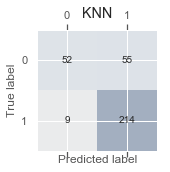

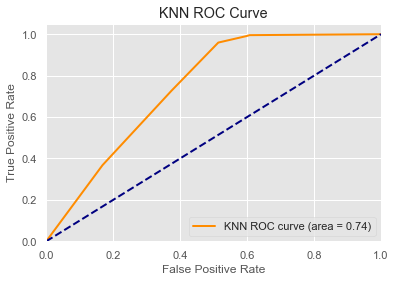

0.9878787878787879
NB , accuracy on training set: 0.98
NB , accuracy on test set: 0.99
Precision: 0.982
Recall: 1.000
F1: 0.991


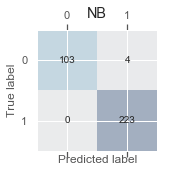

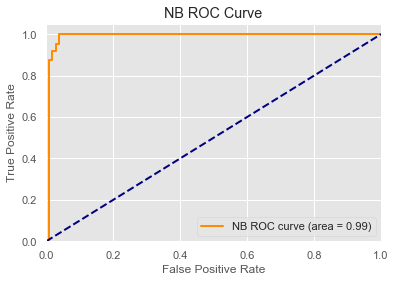

0.7484848484848485
ANN , accuracy on training set: 0.74
ANN , accuracy on test set: 0.75
Precision: 0.769
Recall: 0.897
F1: 0.828


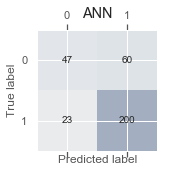

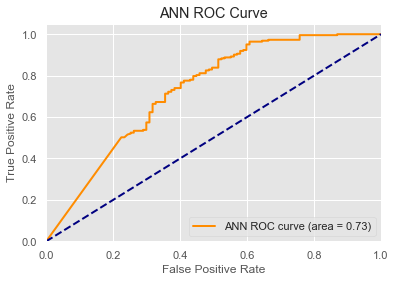

In [189]:
clfs = []
clfs.append(('KNN', KNeighborsClassifier()))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier()))



for name, clf in clfs:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    y_predict_probabilities = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    confmat =confusion_matrix(y_true=y_test, y_pred=predictions)
    #print(confmat)
    print (accuracy_score(y_test, predictions))
    print(name,', accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print(name,', accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=predictions))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=predictions))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=predictions))
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title(name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    
    plt.figure()
    plt.title(name)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=name + ' ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()





## Excellent! This is the first section of the book completed you have loaded and processed a dataset and trained your first 3 machine learning models. 

####  You can now practice further using various classifiers/models and datasets, details included below so you can do your own testing and further analysis.

### Selecting more Classifiers

*Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.
The flowchart below is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.* - Pedregosa et al. (2011).

More Details here:  __[Classifier Cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__

<img src="img/cheatsheet.jpg" width="280" height="280" align="left"/> <br><br>
   -  **Classification:** *The model will predict on a class label, such as Loan Default.* <br>
   -  **Regression:** *The model will predict a continuous quantity output for an example house price rises.* <br>
   -  **Clustering:** *The model will group data points or items into groups with similar characteristics.* <br>
   -  **Dimensionality Reduction:** *This will reduce the number of dimensions ie We need to identify the features that can improve the model and disregard those that do not.*
<br><br>

### Classifier Example:
**Note:** *If you want to test other classifiers you need to import their libraries. As an example we will **import tree** for the Decision Tree algorithim as seen below. More Details on the Decision Tree Model here:*  __[Decision Trees](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__<br><br>
1. Copy the below code.<br>
2. Then paste the code in the cell below. <br>
4. Then then hit run. <br><br>
from sklearn import tree <br>
clf = tree.DecisionTreeClassifier() <br>
clf.fit(X_train, y_train) <br>
print(clf.score(X_train, y_train))<br>
print(clf.score(X_test, y_test)) <br>
predictions = clf.predict(X_test) <br>
print('These are the predictions', predictions)


### More Datasets:
**Datasets for Machine Learning!**

1. **Kaggle:** *is the world's largest community of data scientists and machine learners, where they host 1000's of Datasets to practice your skills:* __[Kaggle](https://www.kaggle.com/datasets)__<br>
2. **The UCI Machine Learning Repository:** *is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.:*  __[UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)__<br>



### Titanic
*I recommend practicing on the famous **Titanic dataset**, before moving on to the next section. This will enable you to practice the concepts you have learned here and further enhance your Machine Learning skills, and prove you have understood the basics. The Titanic dataset is hosted on Kaggle. Download here:*  __[Titanic Dataset](https://www.kaggle.com/c/titanic)__<br><br>
Or you can download the data and code to help you with creating a model for the Titanic datset; from  
my github [https://github.com/tullshaun/MachineLearning/tree/master/TitanicData)  <br>

<img src="img/titanic.jpg" width="240" height="240" align="left"/> <br>
*The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.*

*One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.*

*As with the 'loan application data' machine learning task, this is also a binary classification machine learning task. The aim is to complete an analysis of the Titanic dataset and predict the types of people who were likely to survive.*